In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

np.random.seed(42)

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.manifold import TSNE, Isomap

import matplotlib.pyplot as plt

In [3]:
def test(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
  bag = BaggingRegressor().fit(X_train, y_train)
  print(bag.score(X_test, y_test))

Регрессия и все с нею связанное

In [4]:
data_regression = pd.read_csv("../data/kc_house_data.csv")
data_regression["date"]=data_regression["date"].str[:4]
data_regression["date"]=pd.to_numeric(data_regression["date"])
y = data_regression["price"]
X = data_regression.drop(["price"], axis = 1)
data_regression

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
test(X, y)

0.8553909605448788


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
test(X_scaled, y)

0.8675212820986693


In [8]:
X.describe()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014.322954,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,0.467616,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,2014.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014.000000,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015.000000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Отбор признаков с высокой дисперсией

In [20]:
vt = VarianceThreshold(1)
X_vt = vt.fit_transform(X)
print(X_vt.shape)
test(X_vt, y)

(21613, 11)
0.7526999884574543


In [23]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.tail()

,id,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
21608,2.630000e+08,1530.0,1131.0,8.0,1530.0,0.0,2009.0,0.0,98103.0,1530.0,1509.0
21609,6.600060e+09,2310.0,5813.0,8.0,2310.0,0.0,2014.0,0.0,98146.0,1830.0,7200.0
21610,1.523300e+09,1020.0,1350.0,7.0,1020.0,0.0,2009.0,0.0,98144.0,1020.0,2007.0
21611,2.913101e+08,1600.0,2388.0,8.0,1600.0,0.0,2004.0,0.0,98027.0,1410.0,1287.0
21612,1.523300e+09,1020.0,1076.0,7.0,1020.0,0.0,2008.0,0.0,98144.0,1020.0,1357.0


Одномерный отбор

In [26]:
for i in range(1,15):
    skb = SelectKBest(k=i)
    X_skb = skb.fit_transform(X, y)
    print("k=", i)
    test(X_skb, y)
    print("----------------")

k= 1
0.4616464097218238
----------------
k= 2
0.49616792677530275
----------------
k= 3
0.49132343306482407
----------------
k= 4
0.5384178361072368
----------------
k= 5
0.523500858859091
----------------
k= 6
0.7029340240439812
----------------
k= 7
0.7660554478204126
----------------
k= 8
0.7939691690607483
----------------
k= 9
0.7818459108778549
----------------
k= 10
0.7880723510259378
----------------
k= 11
0.7886288952487612
----------------
k= 12
0.8003188849781482
----------------
k= 13
0.7809492459171251
----------------
k= 14
0.8253475224032716
----------------


In [30]:
bestIthink = SelectKBest(k=8)
Uhu = bestIthink.fit_transform(X, y)
test(Uhu, y)
print(bestIthink.get_feature_names_out())

0.7887964181766031
['bathrooms' 'sqft_living' 'waterfront' 'view' 'grade' 'sqft_above' 'lat'
 'sqft_living15']


Рекурсивный отбор

In [31]:
tree = DecisionTreeRegressor().fit(X, y)

In [33]:
for i in range(1, 6):
    rfe = RFE(estimator=tree, n_features_to_select=i, step=100).fit(X, y)
    X_rfe = pd.DataFrame(rfe.transform(X), columns=rfe.get_feature_names_out())
    test(X_rfe, y)

0.5659326028162486
0.5023738335335044
0.7021215706037345
0.8127963410661972
0.8605254136879803


In [34]:
bestRFEIThink = RFE(estimator=tree, n_features_to_select=4, step=100).fit(X, y)
X_rfe = pd.DataFrame(rfe.transform(X), columns=rfe.get_feature_names_out())
test(X_rfe, y)
print(bestRFEIThink.get_feature_names_out())

0.8696861165046279
['sqft_living' 'grade' 'lat' 'long']


Метод главных компонент

In [36]:
for i in range(1,15):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X, y)
    print(X_pca.shape)
    print(sum(pca.explained_variance_ratio_))
    test(X_pca, y)
    print("-------------")

(21613, 1)
0.999999999707631
0.2874383793577444
-------------
(21613, 2)
0.9999999999654228
0.23882867632552507
-------------
(21613, 3)
0.9999999999997228
0.13517037151994915
-------------
(21613, 4)
0.9999999999999264
0.3915105368043117
-------------
(21613, 5)
0.99999999999996
0.5217772602699426
-------------
(21613, 6)
0.9999999999999803
0.5056074208131489
-------------
(21613, 7)
0.9999999999999982
0.511905578472603
-------------
(21613, 8)
0.9999999999999986
0.6075384013575386
-------------
(21613, 9)
0.9999999999999982
0.5708472559867821
-------------
(21613, 10)
0.9999999999999982
0.6322992668726212
-------------
(21613, 11)
0.9999999999999982
0.6459332067154784
-------------
(21613, 12)
0.9999999999999982
0.6670309486159651
-------------
(21613, 13)
0.9999999999999982
0.6740998919169428
-------------
(21613, 14)
0.9999999999999982
0.680093836169942
-------------


Нелинейные методы выделения признаков

In [42]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X[:10000])
test(X_tsne, y[:10000])

0.09418994086880761


In [72]:
tsne1 = TSNE(n_components=2)
X_tsne1 = tsne1.fit_transform(X[:100])
test(X_tsne1, y[:100])

-0.6865399463069868


In [73]:
isomap = Isomap()
X_isomap = isomap.fit_transform(X[:360])
test(X_isomap, y[:360])

-0.5583405309108314


C:\Users\Aron\Desktop\Учеба\4 семестр\Машинное обучение\Jupiter nouts\venv\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 11 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\Aron\Desktop\Учеба\4 семестр\Машинное обучение\Jupiter nouts\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Aron\Desktop\Учеба\4 семестр\Машинное обучение\Jupiter nouts\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Aron\Desktop\Учеба\4 семестр\Машинное обучение\Jupiter nouts\venv\lib\site-packages\scipy\sparse

Понижение размерности для классификации

In [115]:
data_classification = pd.read_csv("../data/card_transdata.csv")
data_classification = data_classification.sort_values(by='fraud', ascending=False)
data_classification = data_classification[:(data_classification[data_classification['fraud'] == 1].shape[0]*2)]
print(data_classification[data_classification['fraud'] == 0].shape, data_classification[data_classification['fraud'] == 1].shape)
data_classification = data_classification.sample(frac=1)
x_under = data_classification.drop(["fraud"], axis = 1)
y_under = data_classification["fraud"]
data_classification

(87403, 8) (87403, 8)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
703778,0.187051,3.458460,0.497488,0.0,0.0,0.0,0.0,0.0
891579,163.810660,13.533889,2.601019,1.0,0.0,0.0,1.0,1.0
514011,108.305991,4.717771,4.575967,1.0,0.0,0.0,1.0,1.0
662552,48.113318,2.641942,0.398721,1.0,0.0,0.0,1.0,0.0
705981,2.832829,1.590991,1.607049,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
632070,20.521114,0.233488,6.017318,1.0,0.0,0.0,1.0,1.0
716534,11.771778,4.091279,1.289488,1.0,1.0,0.0,1.0,0.0
738420,29.093223,0.929251,1.028641,1.0,0.0,0.0,0.0,0.0
718416,49.864353,2.117588,5.070390,1.0,0.0,0.0,0.0,0.0


In [116]:
def testC(x, Y):
  X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.15, shuffle=False)
  bag = BaggingClassifier().fit(X_train, y_train)
  print(classification_report(y_test, bag.predict(X_test)))

In [117]:
testC(x_under, y_under)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13361
         1.0       1.00      1.00      1.00     12860

    accuracy                           1.00     26221
   macro avg       1.00      1.00      1.00     26221
weighted avg       1.00      1.00      1.00     26221



In [120]:
vt1 = VarianceThreshold(2)
X_vtC = vt1.fit_transform(x_under)
print(X_vtC.shape)
X_vtC = pd.DataFrame(X_vtC, columns=vt1.get_feature_names_out())
X_vtC.head()

(174806, 3)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
0,0.187051,3.458460,0.497488
1,163.810660,13.533889,2.601019
2,108.305991,4.717771,4.575967
3,48.113318,2.641942,0.398721
4,2.832829,1.590991,1.607049


In [121]:
testC(x_under, y_under)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13361
         1.0       1.00      1.00      1.00     12860

    accuracy                           1.00     26221
   macro avg       1.00      1.00      1.00     26221
weighted avg       1.00      1.00      1.00     26221



Одномерный отбор признаков

In [122]:
for i in range(1,8):
    print("count_of_features=",i)
    skb = SelectKBest(k=i)
    X_skb = skb.fit_transform(x_under, y_under)
    testC(X_skb, y_under)
    print(skb.get_feature_names_out())

count_of_features= 1
              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78     13361
         1.0       0.77      0.75      0.76     12860

    accuracy                           0.77     26221
   macro avg       0.77      0.77      0.77     26221
weighted avg       0.77      0.77      0.77     26221

['ratio_to_median_purchase_price']
count_of_features= 2
              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80     13361
         1.0       0.80      0.78      0.79     12860

    accuracy                           0.80     26221
   macro avg       0.80      0.80      0.80     26221
weighted avg       0.80      0.80      0.80     26221

['ratio_to_median_purchase_price' 'online_order']
count_of_features= 3
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81     13361
         1.0       0.81      0.79      0.80     12860

    accuracy                      

Рекурсивный отбор признаков

In [124]:
treeC = DecisionTreeClassifier().fit(x_under, y_under)
for i in range(1,8):
    rfe = RFE(estimator=treeC, n_features_to_select=i, step=1).fit(x_under, y_under)
    X_rfe = pd.DataFrame(rfe.transform(x_under), columns=rfe.get_feature_names_out())
    testC(X_rfe, y_under)
    print(rfe.get_feature_names_out())

              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78     13361
         1.0       0.77      0.75      0.76     12860

    accuracy                           0.77     26221
   macro avg       0.77      0.77      0.77     26221
weighted avg       0.77      0.77      0.77     26221

['ratio_to_median_purchase_price']
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93     13361
         1.0       0.92      0.92      0.92     12860

    accuracy                           0.92     26221
   macro avg       0.92      0.92      0.92     26221
weighted avg       0.92      0.92      0.92     26221

['distance_from_home' 'ratio_to_median_purchase_price']
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95     13361
         1.0       0.92      0.99      0.95     12860

    accuracy                           0.95     26221
   macro avg       0.95      0.95    

Метод главных компонент

In [125]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(x_under, y_under)
print(X_pca.shape)

(174806, 3)


In [126]:
sum(pca.explained_variance_ratio_)

0.9999560236921603

In [128]:
testC(X_pca, y_under)

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95     13361
         1.0       0.92      0.99      0.95     12860

    accuracy                           0.95     26221
   macro avg       0.96      0.95      0.95     26221
weighted avg       0.96      0.95      0.95     26221



Нелинейные методы выделения признаков

In [130]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(x_under[:3000])
testC(X_tsne, y_under[:3000])

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       225
         1.0       0.90      0.92      0.91       225

    accuracy                           0.91       450
   macro avg       0.91      0.91      0.91       450
weighted avg       0.91      0.91      0.91       450



In [131]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(x_under[:3000])
testC(X_isomap, y_under[:3000])

              precision    recall  f1-score   support

         0.0       0.66      0.77      0.71       225
         1.0       0.72      0.60      0.66       225

    accuracy                           0.68       450
   macro avg       0.69      0.68      0.68       450
weighted avg       0.69      0.68      0.68       450



In [132]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X -  self.mean

        cov = np.cov(X.T)

        eigenvectors, eigenvalues = np.linalg.eig(cov)

        eigenvectors = eigenvectors.T

        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

In [151]:
data_classification1 = pd.read_csv("../data/card_transdata.csv")
x = data_classification1.drop(["fraud"], axis = 1)
Y = data_classification1["fraud"]

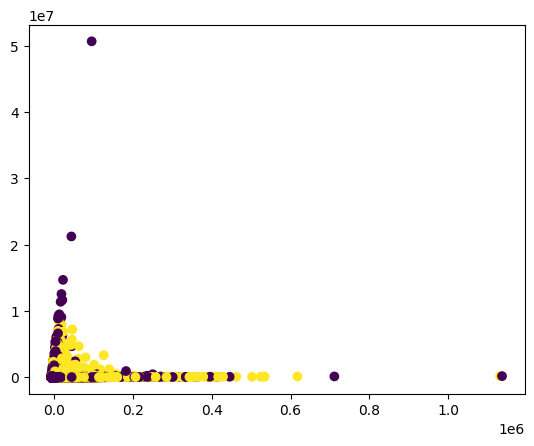

In [152]:
pca = PCA(2)
pca.fit(x)
X_projected = pca.transform(x)

plt.scatter(X_projected[:,0], X_projected[:,1], c=Y);
plt.show()

In [153]:
testC(X_projected, Y)

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96    136918
         1.0       0.61      0.49      0.54     13082

    accuracy                           0.93    150000
   macro avg       0.78      0.73      0.75    150000
weighted avg       0.92      0.93      0.92    150000



In [143]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KMeans:

    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        self.clusters = [[] for _ in range(self.K)]

        self.centroids = []


    def fit_predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()
        # классификация выборки как индекс их кластеров
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels


    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx


    def _get_centroids(self, clusters):
        # присваивание среднего значения кластеров центроидам
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    
    def inertia(self):
        dis = []
        for i, index in enumerate(self.clusters):
            sample = self.X[index].T
            for j in range(0, len(sample[0])):
              dis.append(euclidean_distance((sample[0][j],sample[1][j]), self.centroids[i]))
        itog = [x ** 2 for x in dis]
        return sum(itog)

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

2


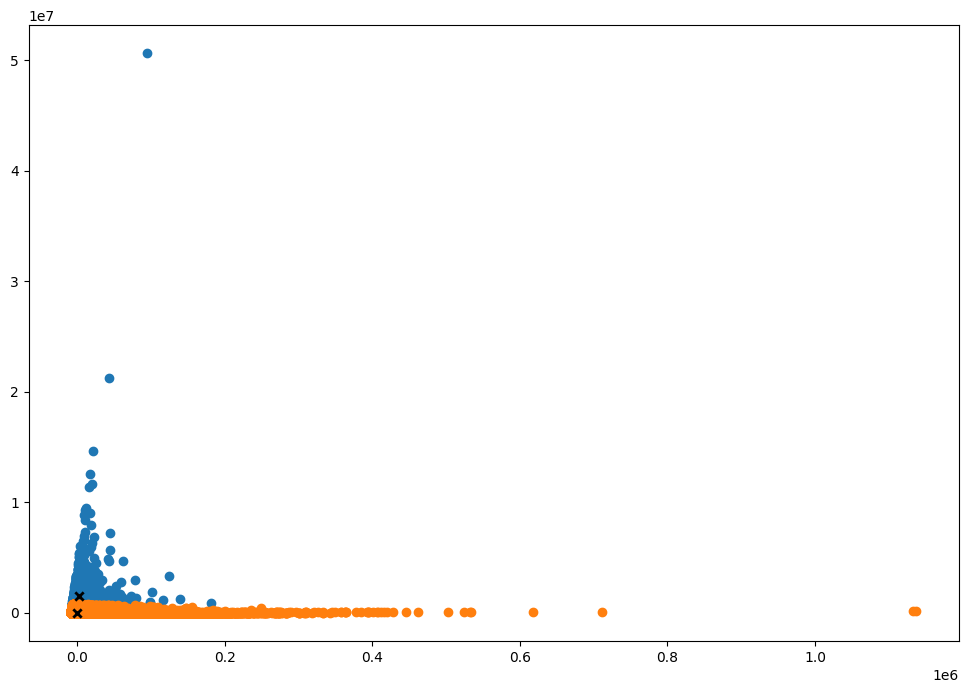

In [154]:
clusters = len(np.unique(Y))
print(clusters)

k = KMeans(K=clusters, max_iters=30, plot_steps=False)
k.fit_predict(X_projected)

k.plot()

LAST Mission

In [163]:
class LinearRegression:

    def __init__(self, lr = 0.001, n_iters=10000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)
            if self.lr > 0:
                self.weights = self.weights - self.lr * dw
                self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

In [164]:
data_regression = pd.read_csv("../data/kc_house_data.csv")
data_regression["date"]=data_regression["date"].str[:4]
data_regression["date"]=pd.to_numeric(data_regression["date"])
y = data_regression["price"]
X = data_regression.drop(["price"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [165]:
reg = LinearRegression(lr=0.0001)
reg.fit(X_train[:100],y_train[:100])
predictions = reg.predict(X_test)

C:\Users\Aron\AppData\Local\Temp\ipykernel_20720\1579064509.py:20: RuntimeWarning: invalid value encountered in subtract
  self.weights = self.weights - self.lr * dw


In [166]:
print(predictions)

[nan nan nan ... nan nan nan]
